This notebook serves for extensive hyperparameter optimization of XGB Classifier. Moreover, we looked at the feature importances of the best model and trained XGB on selected most important features.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle

# packages for models
from xgboost import XGBClassifier

# import own functions
from ipynb.fs.full.Functions import load_train_test_data, model_eval, run_gridsearchCV, load_model, feature_importance

import warnings
warnings.filterwarnings('ignore')

In [8]:
# load the data with all numerical features for best XGB model
df_all_stats = pd.read_pickle('../results/df_prep_numerical_only_all_stats.pkl')

# load train/test data
X_train, X_test, y_train, y_test = load_train_test_data(df_all_stats, verbose=False, test_size=0.3)

# XGB

In [3]:
# define the model
xgb_model = XGBClassifier(random_state=0, verbosity=0, updater='grow_gpu_hist', tree_method='gpu_hist')

# define the grid for the hyperparameter search
xgb_grid = {'n_estimators': [5, 10, 100, 200, 250, 300],
            'max_depth' : [2, 5, 10, 20, 30, None], 
            'eta': [0.0001, 0.001, 0.01, 0.1], 
            'sampling_method': ['uniform', 'gradient_based'], 
            'gamma': [0, 0.01, 0.1]
           }

run_gridsearchCV(xgb_model, xgb_grid, X_train, y_train, name_spec='final')

Fitting 5 folds for each of 864 candidates, totalling 4320 fits
[CV] END eta=0.0001, gamma=0, max_depth=2, n_estimators=5, sampling_method=uniform; total time=   5.2s
[CV] END eta=0.0001, gamma=0, max_depth=2, n_estimators=5, sampling_method=uniform; total time=   0.0s
[CV] END eta=0.0001, gamma=0, max_depth=2, n_estimators=5, sampling_method=uniform; total time=   0.0s
[CV] END eta=0.0001, gamma=0, max_depth=2, n_estimators=5, sampling_method=uniform; total time=   0.0s
[CV] END eta=0.0001, gamma=0, max_depth=2, n_estimators=5, sampling_method=uniform; total time=   0.0s
[CV] END eta=0.0001, gamma=0, max_depth=2, n_estimators=5, sampling_method=gradient_based; total time=   0.0s
[CV] END eta=0.0001, gamma=0, max_depth=2, n_estimators=5, sampling_method=gradient_based; total time=   0.0s
[CV] END eta=0.0001, gamma=0, max_depth=2, n_estimators=5, sampling_method=gradient_based; total time=   0.0s
[CV] END eta=0.0001, gamma=0, max_depth=2, n_estimators=5, sampling_method=gradient_based; 


Evaluation: f1_score
100.00% for the train data
82.78% for the test data

Evaluation: accuracy_score
100.00% for the train data
82.61% for the test data

Evaluation: precision_score
100.00% for the train data
83.99% for the test data

Evaluation: recall_score
100.00% for the train data
82.06% for the test data

Evaluation: confusion_matrix of test predictions


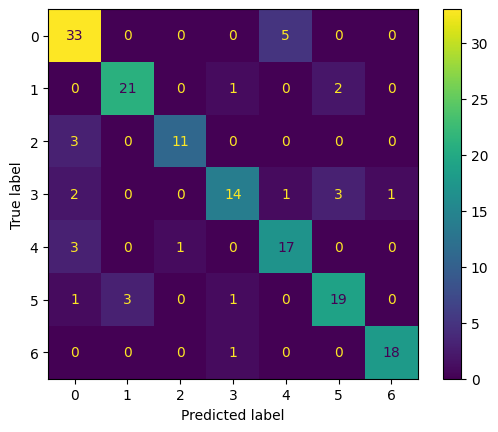


Hard cases for the model:

Label: disgust(2)
Hard cases of false negatives: ['anger(0)']

Label: happiness(4)
Hard cases of false positives: ['anger(0)']



In [9]:
xgb_best_model = load_model('XGBClassifier', 'f1_macro', name_spec='final')
model_eval(xgb_best_model, X_train, X_test, y_train, y_test, confusion=True)

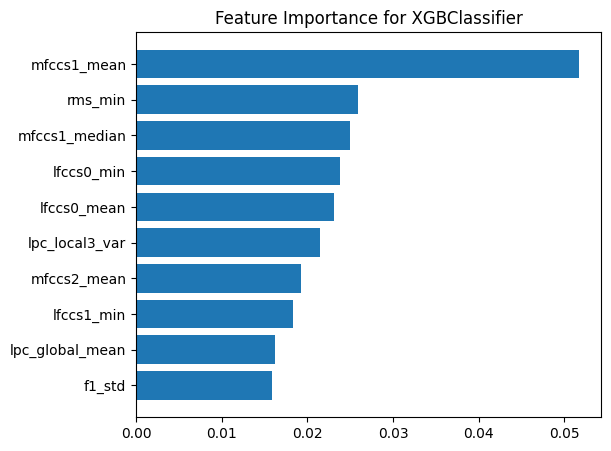

In [16]:
feature_imp_xgb_10 = feature_importance(xgb_best_model, X_test, y_test, top=10)

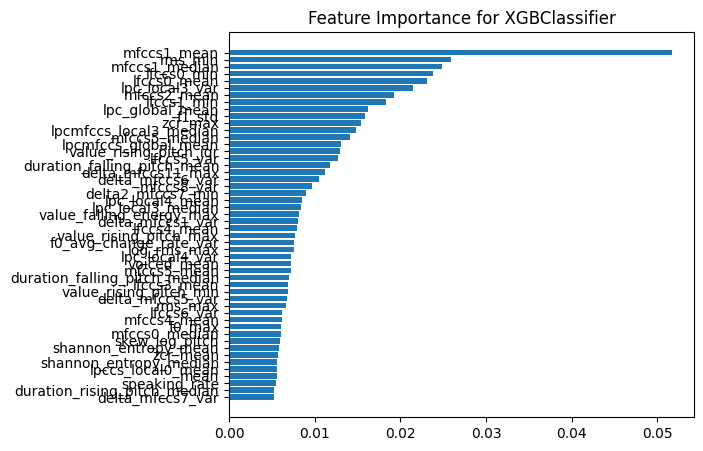

In [14]:
feature_imp_xgb = feature_importance(xgb_best_model, X_test, y_test, top=50)


Evaluation: f1_score
100.00% for the train data
65.39% for the test data

Evaluation: accuracy_score
100.00% for the train data
66.46% for the test data

Evaluation: precision_score
100.00% for the train data
66.57% for the test data

Evaluation: recall_score
100.00% for the train data
65.58% for the test data

Evaluation: confusion_matrix of test predictions


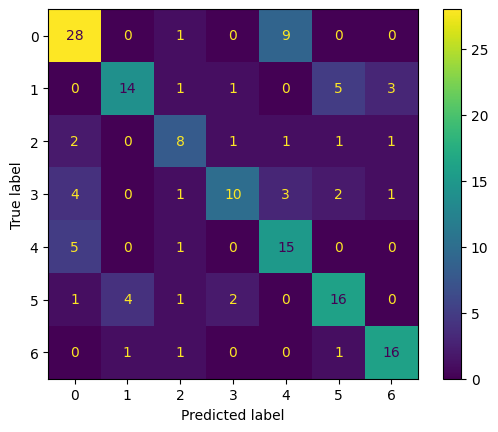


Hard cases for the model:

Label: anger(0)
Hard cases of false negatives: ['happiness(4)']

Label: boredom(1)
Hard cases of false negatives: ['neutral(5)']
Hard cases of false positives: ['neutral(5)']

Label: happiness(4)
Hard cases of false negatives: ['anger(0)']
Hard cases of false positives: ['anger(0)']



In [15]:
# run best model with most important features only
feature_imp_xgb = list(feature_imp_xgb)
feature_imp_xgb.append('label')

df_topx_xgb = df_all_stats[feature_imp_xgb].copy()

# load train/test data
X_train_mostimp, X_test_mostimp, y_train_mostimp, y_test_mostimp = load_train_test_data(df_topx_xgb, verbose=False, test_size=0.3)

# run and evaluate the model
xgb_best_model = load_model('XGBClassifier', 'f1_macro', name_spec='final')
xgb_topx = XGBClassifier().set_params(**xgb_best_model.get_params())
xgb_topx.fit(X_train_mostimp, y_train_mostimp)
model_eval(xgb_topx, X_train_mostimp, X_test_mostimp, y_train_mostimp, y_test_mostimp, confusion=True)